# Road Traffic Accidents – Saudi Arabia (National & Regional)

In this part of the project we look at **road traffic accidents, injuries, and deaths** in Saudi Arabia.

Goals:

- Load and understand the different accident datasets.
- Clean and standardize them.
- Compute simple statistics and percentages.
- Build time series over years and regions.
- Plot the main trends in a clear way for policy dis

In [6]:
# Basic imports for analysis

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

%matplotlib inline

## 1. Set the data folder and file paths

The accident files are stored under the `Data/Road_Accidents` folder in the project.

Here we point Python to that folder and define the paths for each dataset.

If your folder or file names differ slightly, update the strings below.

In [7]:
# Adjust these paths if your structure is different
DATA_DIR = Path("..") / "Data" / "Road_Accidents"

injuries_deaths_file = DATA_DIR / "Injuries and Deaths  from Road Traffic Accidents.xlsx"
regional_casualties_file = DATA_DIR / "saudi-arabia-traffic-accidents-and-casualties-injured-dead-2008.xlsx"
accidents_2024_file = DATA_DIR / "total road traffic Accidents.xlsx"

# Historical .xls files (optional, if you want to use them later)
accidents_1437_file = DATA_DIR / "Traffic Accident Statistics as of 1437 H.xls"
accidents_1438_file = DATA_DIR / "Traffic Accident Statistics as of 1438 H.xls"
accidents_1439_file = DATA_DIR / "Traffic Accident Statistics as of 1439 H.xls"

DATA_DIR, list(DATA_DIR.glob("*.xls*"))


(WindowsPath('../Data/Road_Accidents'),
 [WindowsPath('../Data/Road_Accidents/Injuries and Deaths  from Road Traffic Accidents.xlsx'),
  WindowsPath('../Data/Road_Accidents/saudi-arabia-traffic-accidents-and-casualties-injured-dead-2008.xlsx'),
  WindowsPath('../Data/Road_Accidents/total road traffic Accidents.xlsx'),
  WindowsPath('../Data/Road_Accidents/Traffic Accident Statistics as of 1437 H.xls'),
  WindowsPath('../Data/Road_Accidents/Traffic Accident Statistics as of 1438 H.xls'),
  WindowsPath('../Data/Road_Accidents/Traffic Accident Statistics as of 1439 H.xls')])

## 2. Load the national injuries and deaths dataset

This file contains **national totals** of injuries and deaths from road traffic accidents over multiple years.

In the raw Excel file:
- The first row is a header row with labels.
- The actual data starts from the second row.

We read the file with `header=1` to treat the second row as the header.

In [8]:
# Load national injuries and deaths (RTA) data
national_df = pd.read_excel(injuries_deaths_file, header=1)

national_df.head()
# Load national injuries and deaths (RTA) data
national_df = pd.read_excel(injuries_deaths_file, header=1)

national_df.head()

,Year,No. of Injuries,No. of Deaths,"Injuries per 100,000 Population","Deaths per 100,000 Population"
0,2014,35843,7486,126.612223,26.443632
1,2015,36302,8063,121.751861,27.042181
2,2016,38120,8759,123.149694,28.296647
3,2017,33199,7218,107.171836,23.300892
4,2018,30217,5787,100.068614,19.164612


## 3. Clean and rename columns for national data

To make analysis easier, we:
- Rename the columns to short, clear English names.
- Check data types.

This dataset is already tidy: one row = one year.

In [9]:
# Start from the DataFrame we just loaded
# 1) Strip any extra spaces from column names
national_df = national_df.copy()
national_df.columns = national_df.columns.str.strip()

print("Columns before rename:", national_df.columns.tolist())

# 2) Rename to simple English names
rename_map = {
    "Year": "year",
    "No. of Injuries": "injuries",
    "No. of Deaths": "deaths",
    "Injuries per 100,000 Population": "injuries_per_100k",
    "Deaths per 100,000 Population": "deaths_per_100k",
}

national_df = national_df.rename(columns=rename_map)

print("Columns after rename:", national_df.columns.tolist())

# 3) Ensure numeric types (only for columns that actually exist)
target_cols = ["injuries", "deaths", "injuries_per_100k", "deaths_per_100k"]
numeric_cols = [col for col in target_cols if col in national_df.columns]

national_df[numeric_cols] = national_df[numeric_cols].apply(pd.to_numeric, errors="coerce")

national_df.info()
national_df.head()

Columns before rename: ['Year', 'No. of Injuries', 'No. of Deaths', 'Injuries per 100,000 Population', 'Deaths per 100,000 Population']
Columns after rename: ['year', 'injuries', 'deaths', 'injuries_per_100k', 'deaths_per_100k']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               10 non-null     int64  
 1   injuries           10 non-null     int64  
 2   deaths             10 non-null     int64  
 3   injuries_per_100k  10 non-null     float64
 4   deaths_per_100k    10 non-null     float64
dtypes: float64(2), int64(3)
memory usage: 532.0 bytes


,year,injuries,deaths,injuries_per_100k,deaths_per_100k
0,2014,35843,7486,126.612223,26.443632
1,2015,36302,8063,121.751861,27.042181
2,2016,38120,8759,123.149694,28.296647
3,2017,33199,7218,107.171836,23.300892
4,2018,30217,5787,100.068614,19.164612


## 4. Compute simple national statistics and percentages

Here we calculate:
- Year-on-year (YoY) percentage change in injuries and deaths.
- The “fatality ratio” = deaths / injuries (%).

These statistics help us see if national safety is improving or getting worse over time.

In [10]:
national_df = national_df.sort_values("year").reset_index(drop=True)

national_df["injuries_yoy_pct"] = national_df["injuries"].pct_change() * 100
national_df["deaths_yoy_pct"] = national_df["deaths"].pct_change() * 100
national_df["fatality_ratio_pct"] = (national_df["deaths"] / national_df["injuries"]) * 100

national_df


,year,injuries,deaths,injuries_per_100k,deaths_per_100k,injuries_yoy_pct,deaths_yoy_pct,fatality_ratio_pct
0,2014,35843,7486,126.612223,26.443632,NaN,NaN,20.885529
1,2015,36302,8063,121.751861,27.042181,1.280585,7.707721,22.210897
2,2016,38120,8759,123.149694,28.296647,5.007989,8.632023,22.977440
3,2017,33199,7218,107.171836,23.300892,-12.909234,-17.593333,21.741619
4,2018,30217,5787,100.068614,19.164612,-8.982198,-19.825436,19.151471
5,2019,32910,5754,109.467203,19.139298,8.912202,-0.570244,17.484047
6,2020,25561,4618,81.010988,14.635920,-22.330599,-19.742788,18.066586
7,2021,25512,4652,82.873189,15.111558,-0.191698,0.736249,18.234556
8,2022,24446,4555,75.977715,14.156856,-4.178426,-2.085125,18.632905
9,2023,24002,4423,70.874792,13.060545,-1.816248,-2.897914,18.427631


## 5. Plot national injuries and deaths over time

We now draw a simple line plot:

- X-axis: year.
- Y-axis: number of injuries and deaths.

This lets us see the overall trend in traffic safety over the last years.

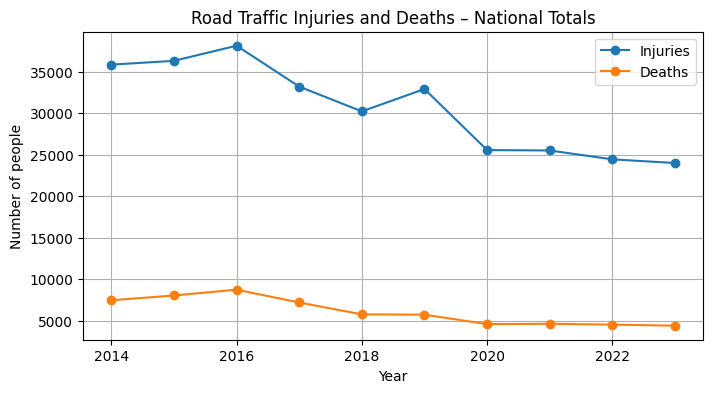

In [11]:
plt.figure(figsize=(8, 4))
plt.plot(national_df["year"], national_df["injuries"], marker="o", label="Injuries")
plt.plot(national_df["year"], national_df["deaths"], marker="o", label="Deaths")
plt.title("Road Traffic Injuries and Deaths – National Totals")
plt.xlabel("Year")
plt.ylabel("Number of people")
plt.grid(True)
plt.legend()
plt.show()

## 6. Plot national rates per 100,000 population

We also plot injuries and deaths **per 100,000 population**.

This normalizes by population size and shows if risk per person is going up or down.

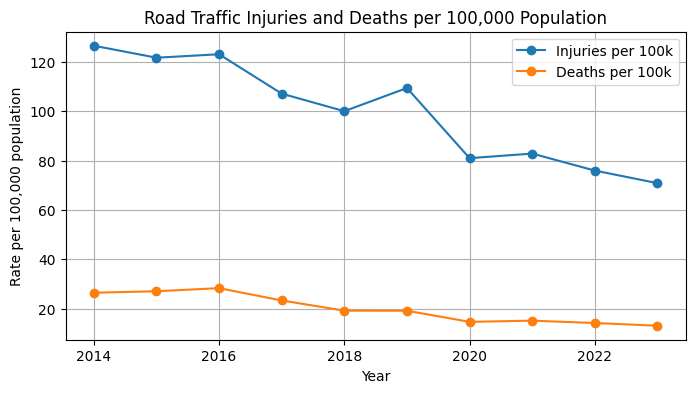

In [12]:
plt.figure(figsize=(8, 4))
plt.plot(national_df["year"], national_df["injuries_per_100k"], marker="o", label="Injuries per 100k")
plt.plot(national_df["year"], national_df["deaths_per_100k"], marker="o", label="Deaths per 100k")
plt.title("Road Traffic Injuries and Deaths per 100,000 Population")
plt.xlabel("Year")
plt.ylabel("Rate per 100,000 population")
plt.grid(True)
plt.legend()
plt.show()

## 7. Plot national fatality ratio

This plot shows, for each year, what percentage of injured people die (deaths / injuries).

It gives a simple view of how severe crashes are over time.

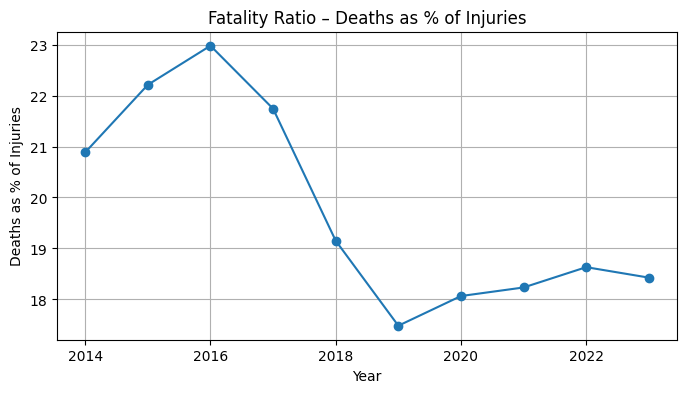

In [13]:
plt.figure(figsize=(8, 4))
plt.plot(national_df["year"], national_df["fatality_ratio_pct"], marker="o")
plt.title("Fatality Ratio – Deaths as % of Injuries")
plt.xlabel("Year")
plt.ylabel("Deaths as % of Injuries")
plt.grid(True)
plt.show()

## 8. Load regional accidents and casualties dataset (with geometry)

This dataset contains **regional data** by year:

- `Year`
- `Region`
- `Indicator` (e.g., No. of Accidents, No. of Casualties - Injured, No. of Casualties - Dead)
- `Value`
- Geometry columns (we keep them for mapping later).

First we load the file and inspect the first rows.

In [14]:
regional_raw_df = pd.read_excel(regional_casualties_file)

regional_raw_df.head()

,Year,Region,Indicator,Value,geo_shape,geo_point_2d
0,2016,Northern Borders,No. of Casualties - Injured,631,"{""coordinates"":[[[45.1753018305,29.163906139],...","30.197074782964457, 41.81711869519104"
1,2016,Jazan,No. of Accidents,25873,"{""coordinates"":[[[[42.4222933077,16.1048956547...","17.207231396174038, 42.652580742166386"
2,2016,Al-Jouf,No. of Casualties - Dead,245,"{""coordinates"":[[[38.2457200401,29.2492560931]...","29.96774457623326, 39.557037117153534"
3,2017,Madinah,No. of Casualties - Injured,2917,"{""coordinates"":[[[[38.5553040293,23.4279811598...","24.92753453903762, 39.491823717312016"
4,2018,Eastern Region,No. of Casualties - Dead,661,"{""coordinates"":[[[[50.3177174721,26.1882572216...","23.28833073067144, 50.14783024385305"


## 9. Reshape regional data into a tidy table

We want one row per **Year–Region**, with separate columns for:

- Number of accidents
- Number of injured
- Number of dead

We pivot the `Indicator` column into separate columns.

In [15]:
# Pivot so each indicator becomes a separate column
regional_pivot = (
    regional_raw_df
    .pivot_table(index=["Year", "Region"],
                 columns="Indicator",
                 values="Value")
    .reset_index()
)

regional_pivot.head()

Indicator,Year,Region,No. of Accidents,No. of Casualties - Dead,No. of Casualties - Injured
0,2016,Al-Baha,3618.0,185.0,1227.0
1,2016,Al-Jouf,10212.0,245.0,920.0
2,2016,Asir,32684.0,983.0,2541.0
3,2016,Eastern Region,101619.0,1113.0,4893.0
4,2016,Hail,10199.0,299.0,932.0


## 10. Clean column names for regional data

We rename the columns to simple names:

- `year`
- `region`
- `accidents`
- `injured`
- `dead`

We also make sure the numeric columns are numeric.

In [16]:
regional_pivot = regional_pivot.rename(columns={
    "Year": "year",
    "Region": "region",
    "No. of Accidents": "accidents",
    "No. of Casualties - Injured": "injured",
    "No. of Casualties - Dead": "dead",
})

num_cols_reg = ["accidents", "injured", "dead"]
regional_pivot[num_cols_reg] = regional_pivot[num_cols_reg].apply(pd.to_numeric, errors="coerce")

regional_pivot.head()

Indicator,year,region,accidents,dead,injured
0,2016,Al-Baha,3618.0,185.0,1227.0
1,2016,Al-Jouf,10212.0,245.0,920.0
2,2016,Asir,32684.0,983.0,2541.0
3,2016,Eastern Region,101619.0,1113.0,4893.0
4,2016,Hail,10199.0,299.0,932.0


## 11. Compute regional rates and shares

Here we compute:
- Injury rate per accident = injured / accidents (%).
- Fatality rate per accident = dead / accidents (%).
- Each region’s **share of national accidents** for a given year.

This helps us see which regions contribute most to the national burden.

In [17]:
# Total accidents per year (national)
yearly_totals = (
    regional_pivot
    .groupby("year", as_index=False)
    .agg(total_accidents_national=("accidents", "sum"))
)

regional_stats = regional_pivot.merge(yearly_totals, on="year", how="left")

regional_stats["injury_rate_per_accident_pct"] = (regional_stats["injured"] / regional_stats["accidents"]) * 100
regional_stats["fatality_rate_per_accident_pct"] = (regional_stats["dead"] / regional_stats["accidents"]) * 100
regional_stats["accident_share_pct"] = (regional_stats["accidents"] /
                                        regional_stats["total_accidents_national"]) * 100

regional_stats.head()

,year,region,accidents,dead,injured,total_accidents_national,injury_rate_per_accident_pct,fatality_rate_per_accident_pct,accident_share_pct
0,2016,Al-Baha,3618.0,185.0,1227.0,1066760.0,33.913765,5.113322,0.339158
1,2016,Al-Jouf,10212.0,245.0,920.0,1066760.0,9.009009,2.399138,0.957291
2,2016,Asir,32684.0,983.0,2541.0,1066760.0,7.774446,3.007588,3.063857
3,2016,Eastern Region,101619.0,1113.0,4893.0,1066760.0,4.815044,1.095268,9.525948
4,2016,Hail,10199.0,299.0,932.0,1066760.0,9.138151,2.931660,0.956073


## 12. Focus on Riyadh vs rest for accidents over time

As our project focuses on traffic safety and infrastructure, Riyadh is a key region.

Here we:
- Filter rows for `region == "Riyadh"`.
- Plot accidents for Riyadh and compare them with the national totals.

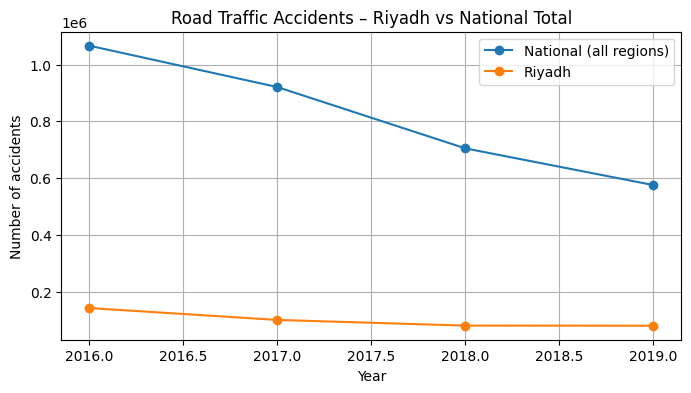

In [18]:
riyadh_stats = regional_stats[regional_stats["region"] == "Riyadh"].copy()

plt.figure(figsize=(8, 4))
plt.plot(regional_stats["year"].unique(), 
         regional_stats.groupby("year")["accidents"].sum().values,
         marker="o", label="National (all regions)")
plt.plot(riyadh_stats["year"], riyadh_stats["accidents"], marker="o", label="Riyadh")
plt.title("Road Traffic Accidents – Riyadh vs National Total")
plt.xlabel("Year")
plt.ylabel("Number of accidents")
plt.grid(True)
plt.legend()
plt.show()

## 13. Accident shares by region (latest available year)

We now look at the latest year in the regional dataset.

We:
- Select the latest year.
- Sort regions by number of accidents.
- Plot a bar chart of accidents and the share of national accidents (%).

This helps identify which regions are most critical from a policy perspective.

In [19]:
latest_year = regional_stats["year"].max()
latest_year_data = regional_stats[regional_stats["year"] == latest_year].copy()

latest_year_data = latest_year_data.sort_values("accidents", ascending=False)

latest_year_data[["region", "year", "accidents", "accident_share_pct"]]

,region,year,accidents,accident_share_pct
55,Total,2019,287781.0,50.000000
53,Riyadh,2019,79474.0,13.808069
49,Makkah,2019,73704.0,12.805571
44,Asir,2019,25342.0,4.403001
48,Madinah,2019,21689.0,3.768317
45,Eastern Region,2019,21235.0,3.689437
47,Jazan,2019,20591.0,3.577547
52,Qassim,2019,16862.0,2.929658
43,Al-Jouf,2019,8487.0,1.474559
54,Tabouk,2019,7089.0,1.231666


## 14. Plot accidents by region for the latest year

This bar chart shows which regions have the highest number of accidents in the latest year in the dataset.

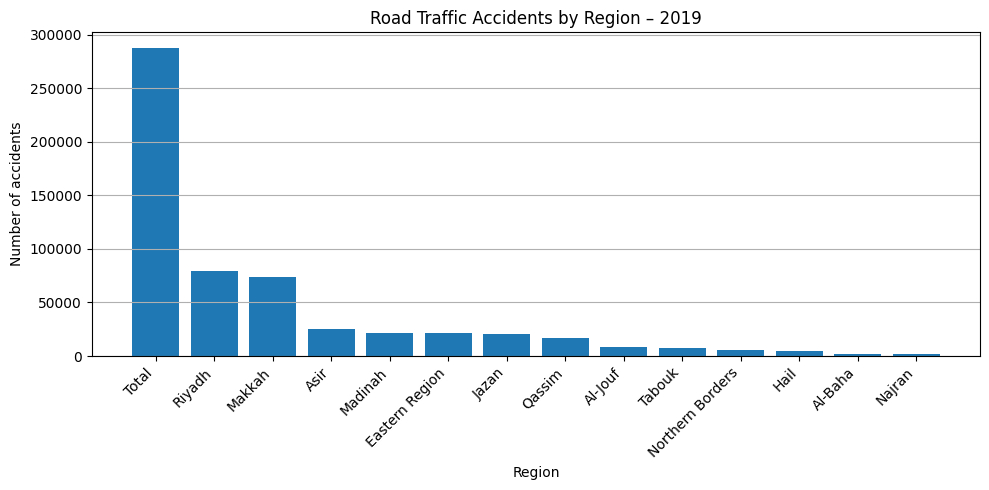

In [20]:
plt.figure(figsize=(10, 5))
plt.bar(latest_year_data["region"], latest_year_data["accidents"])
plt.title(f"Road Traffic Accidents by Region – {latest_year}")
plt.xlabel("Region")
plt.ylabel("Number of accidents")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.grid(True, axis="y")
plt.show()

## 15. Load total road traffic accidents for 2024 (by region)

This file provides **2024 accident counts by region** in Arabic.

We:
- Load the file.
- Skip the first header row.
- Drop the total row.
- Rename columns to English.

In [21]:
acc_2024_raw = pd.read_excel(accidents_2024_file, header=0)

acc_2024_raw


,بلاغات الحوادث المرورية,Unnamed: 1,Unnamed: 2
0,م,المنطقة,2024م
1,1,الرياض,58839
2,2,مكة المكرمة,81480
3,3,المدينة المنورة,9147
4,4,القصيم,5080
5,5,المنطقة الشرقية,17830
6,6,عسير,10891
7,7,تبوك,4806
8,8,حائل,3029
9,9,الحدود الشمالية,1050


## 16. Clean and rename the 2024 regional accidents data

We keep only the rows for individual regions, drop the total row, and give clear names:

- `region`
- `accidents_2024`

In [22]:
# Row 0 is column labels, row with 'الإجمالي' is total
acc_2024 = acc_2024_raw.copy()

# Keep only rows where "المنطقة" is not NaN and not 'الإجمالي'
acc_2024.columns = ["index_col", "region_ar", "accidents_2024"]
acc_2024 = acc_2024[acc_2024["region_ar"].notna()]
acc_2024 = acc_2024[acc_2024["region_ar"] != "الإجمالي"].copy()

# Convert to numeric
acc_2024["accidents_2024"] = pd.to_numeric(acc_2024["accidents_2024"], errors="coerce")

acc_2024.head()

,index_col,region_ar,accidents_2024
0,م,المنطقة,NaN
1,1,الرياض,58839.0
2,2,مكة المكرمة,81480.0
3,3,المدينة المنورة,9147.0
4,4,القصيم,5080.0


## 17. Compute regional accident shares for 2024

We calculate each region’s share of the 2024 accidents:

\[
\text{share} = \frac{\text{accidents in region}}{\text{total accidents}} \times 100
\]

This helps show which regions account for the majority of reported accidents in 2024.

In [23]:
total_2024 = acc_2024["accidents_2024"].sum()
acc_2024["share_2024_pct"] = (acc_2024["accidents_2024"] / total_2024) * 100

acc_2024.sort_values("accidents_2024", ascending=False)

,index_col,region_ar,accidents_2024,share_2024_pct
2,2,مكة المكرمة,81480.0,40.234255
1,1,الرياض,58839.0,29.054288
5,5,المنطقة الشرقية,17830.0,8.804330
6,6,عسير,10891.0,5.377900
3,3,المدينة المنورة,9147.0,4.516725
4,4,القصيم,5080.0,2.508469
7,7,تبوك,4806.0,2.373169
10,10,جازان,4684.0,2.312927
8,8,حائل,3029.0,1.495699
12,12,الباحة,2041.0,1.007832


## 18. Plot accidents by region for 2024

This bar chart shows which regions have the highest number of accidents in 2024.

We can later compare this with the earlier years to see if certain regions are consistently high.

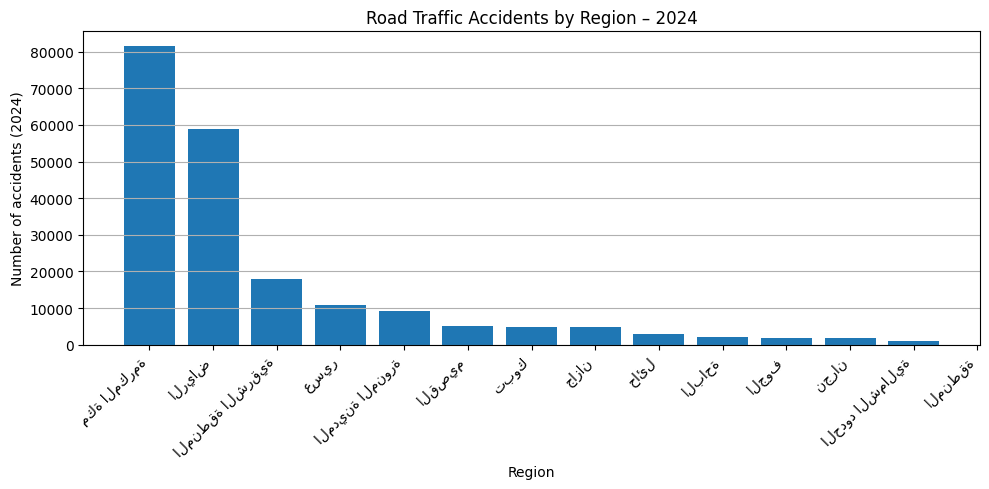

In [24]:
acc_2024_sorted = acc_2024.sort_values("accidents_2024", ascending=False)

plt.figure(figsize=(10, 5))
plt.bar(acc_2024_sorted["region_ar"], acc_2024_sorted["accidents_2024"])
plt.title("Road Traffic Accidents by Region – 2024")
plt.xlabel("Region")
plt.ylabel("Number of accidents (2024)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.grid(True, axis="y")
plt.show()

## 20. Summary for policy use

After running all cells, you will have:

- A national time series of injuries, deaths, and rates per 100k.
- Regional statistics on accidents, injured, and dead (with shares and rates).
- A 2024 regional accident picture.

These can support policy messages such as:
- Which years show improvement or deterioration in road safety.
- Which regions, including Riyadh, carry the heaviest accident burden.
- How accident patterns should influence **where** to focus infrastructure and enforcement measures.

Next steps:
- Link these accident patterns to **traffic volume** and **infrastructure** (e.g., busiest streets in Riyadh).
- Use maps and dashboards to visualize high-risk corridors and justify sensor placement on key intersections.